# Computer Vision Bootcamp: Assignment 2

## Reading

*Take* a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [ ]:
# Import the needed libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read the image
I = cv2.imread('im1.jpeg')

Resize the image to 512*512 pixels using the resize function in OpenCV

In [ ]:
# Resize the image
resized_image = cv2.resize(I, (512,512))

## Converting

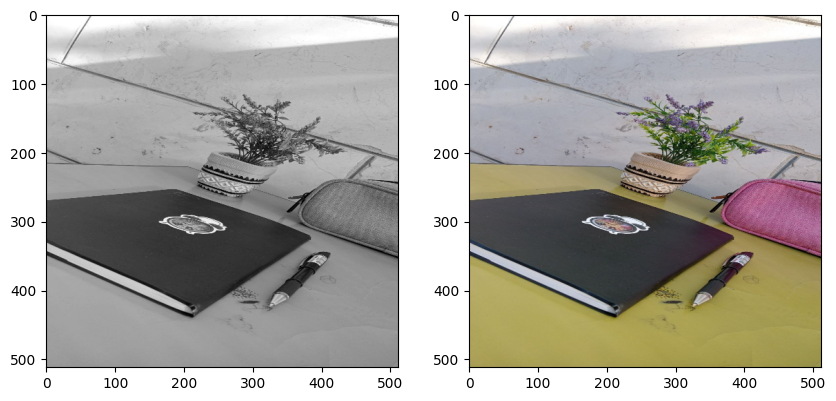

In [ ]:
# Convert the reseized image to RGB
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Convert the reseized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# show the rgb and Gray images image
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.imshow(gray_image, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(rgb_image)

plt.show()

## Edge Detection

### Laplacian of Gaussian

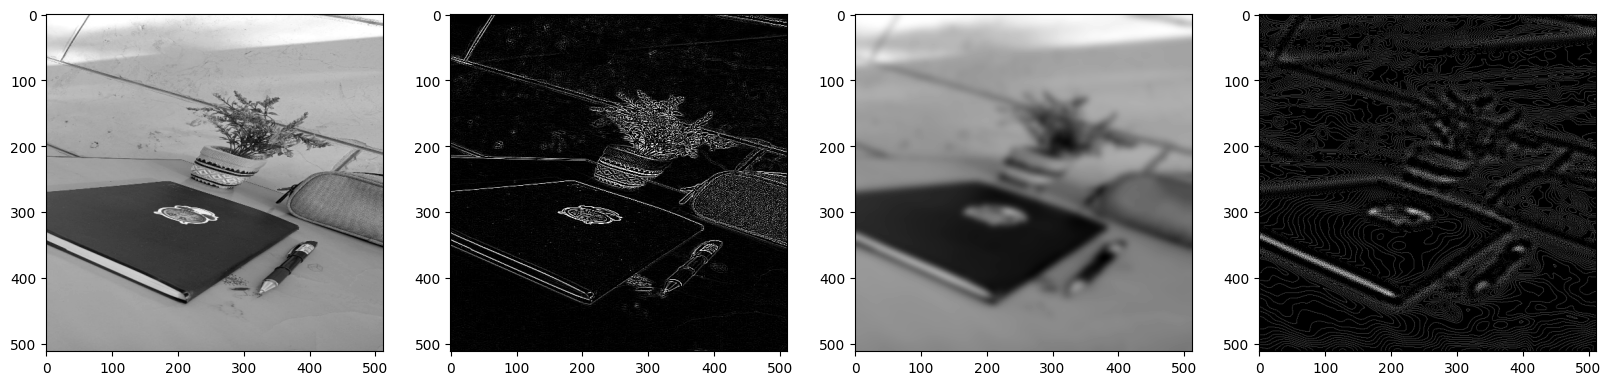

In [ ]:
# Convolve the gray resized image with a Laplacian
lablacian_mask = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])
lab_image = cv2.filter2D(gray_image, -1, lablacian_mask)

# Convolve the gray resized image with a Gaussian of sigma 5
gaussian_image = cv2.GaussianBlur(gray_image, (29,29), 5)

# Find the Laplacian of Gaussian
lablacian_gaussian = cv2.filter2D(gaussian_image, -1, lablacian_mask)

# Show the origional image, the laplacian, the gaussian, and the Laplacian of Gaussian results in one figure
plt.figure(figsize =(20,5))

plt.subplot(1,4,1)
plt.imshow(gray_image, cmap="gray")

plt.subplot(1,4,2)
plt.imshow(lab_image, cmap="gray")

plt.subplot(1,4,3)
plt.imshow(gaussian_image, cmap="gray")

plt.subplot(1,4,4)
plt.imshow(lablacian_gaussian, cmap="gray")

plt.show()

### Difference of Gaussians

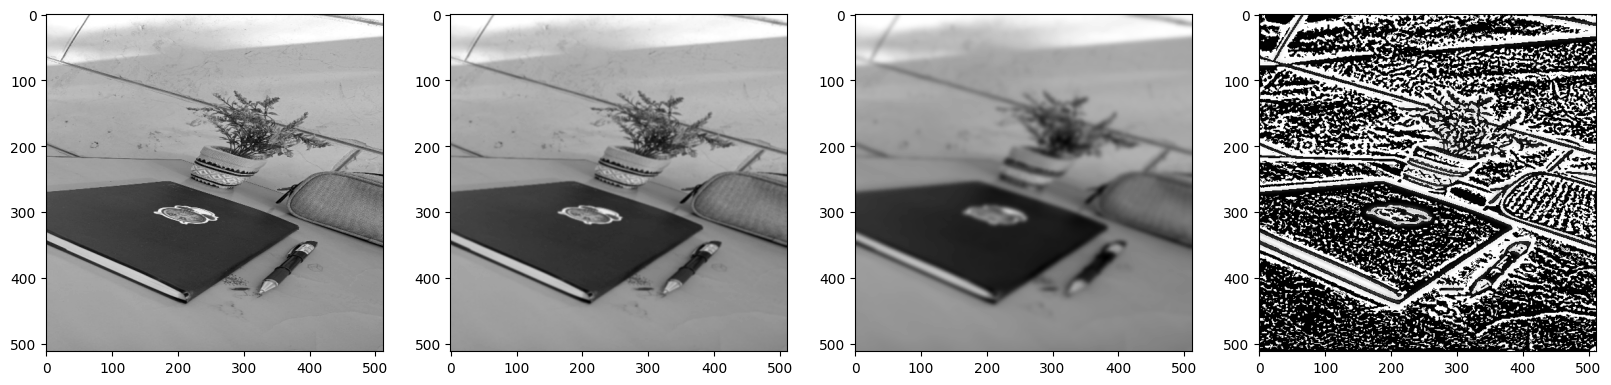

In [ ]:
# Convolve the gray resized image with two gaussians (one with a scale of 1 and another with a scale of 3)
first_gaussian  = cv2.GaussianBlur(gray_image, (31,31), 1)
second_gaussian = cv2.GaussianBlur(gray_image, (31,31), 3)

# find the difference of gaussians
gaussian_dif =  second_gaussian - first_gaussian

# Show the origional image, the two gaussians results, and the DoG results
plt.figure(figsize =(20,5))

plt.subplot(1,4,1)
plt.imshow(gray_image, cmap="gray")

plt.subplot(1,4,2)
plt.imshow(first_gaussian, cmap="gray")

plt.subplot(1,4,3)
plt.imshow(second_gaussian, cmap="gray")

plt.subplot(1,4,4)
plt.imshow(gaussian_dif, cmap="gray")

plt.show()

### Canny Edge Detector

median =  158
lower  =  107
upper  =  208


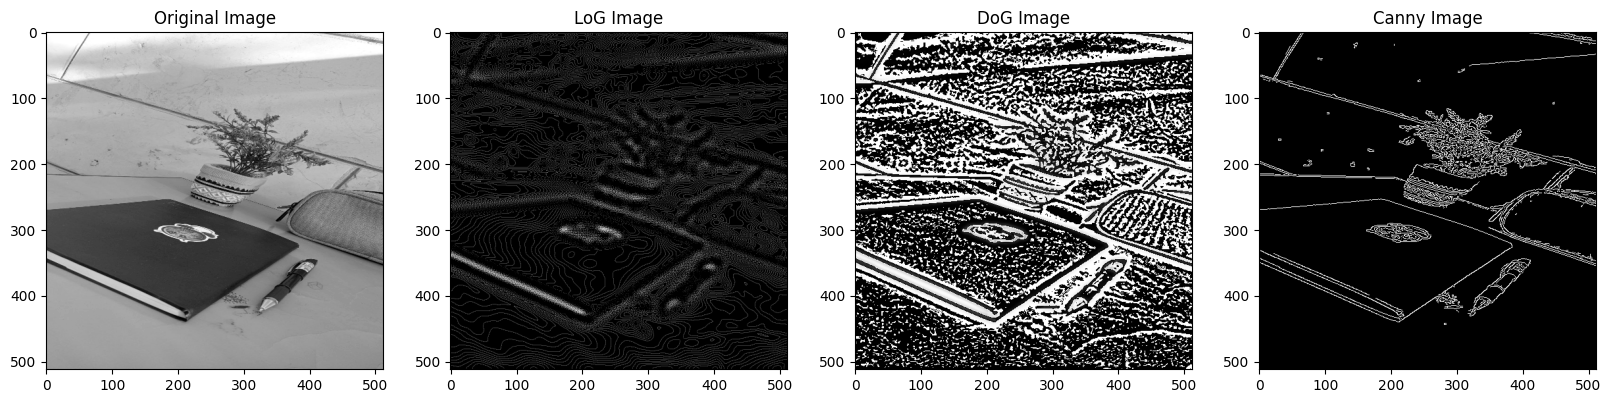

In [ ]:
# Find the median then the two thresholds of the gray resized image, and print the three values
med = int(np.median(gray_image))
lower = int(0.68*med)
upper = int(1.32*med)
print('median = ',med)
print('lower  = ',lower)
print('upper  = ',upper)

# Apply automatic Canny edge detection using the computed thresholds
canny_image = cv2.Canny(gray_image,lower,upper)

# show the origional image, the LoG, the DoG, and the Canny results in one figure
plt.figure(figsize =(20,5))

plt.subplot(1,4,1)
plt.imshow(gray_image, cmap="gray")
plt.title('Original Image')

plt.subplot(1,4,2)
plt.imshow(lablacian_gaussian, cmap="gray")
plt.title('LoG Image')

plt.subplot(1,4,3)
plt.imshow(gaussian_dif, cmap="gray")
plt.title('DoG Image')

plt.subplot(1,4,4)
plt.imshow(canny_image, cmap="gray")
plt.title('Canny Image')

plt.show()

## Morphological Operations

### Opening or Closing

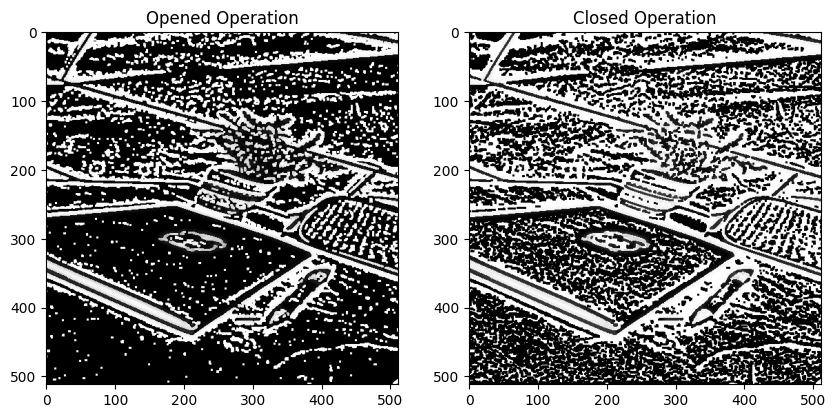

In [ ]:
# enhance the DoG results using opening or closing, create a mask with suitable size and shape then use opening or closing
kernel = np.ones((3,3))
opened=cv2.morphologyEx(gaussian_dif,cv2.MORPH_OPEN,kernel)
closed=cv2.morphologyEx(gaussian_dif,cv2.MORPH_CLOSE,kernel)

# show the origional Dog and the enhanced DoG
plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
plt.imshow(opened, cmap="gray")
plt.title('Opened Operation')

plt.subplot(1,2,2)
plt.imshow(closed, cmap="gray")
plt.title('Closed Operation')

plt.show()

### Histogram and Binarization

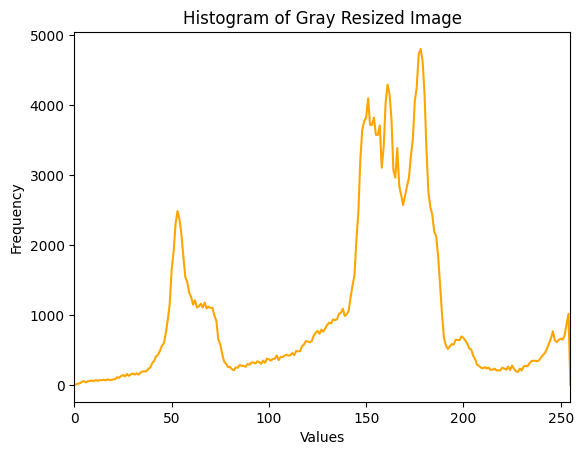

In [ ]:
# Find the histogram of the gray resized image and plot it
histo_image = cv2.calcHist([gray_image],[0],None, [256], [0, 255])
plt.plot(histo_image, color='orange')
plt.xlim([0,255])
plt.title('Histogram of Gray Resized Image')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

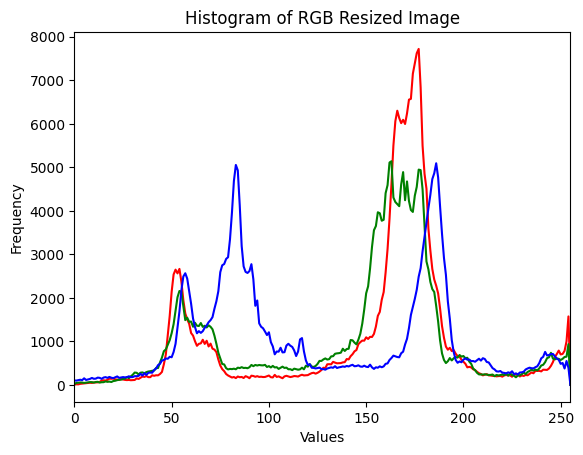

In [ ]:
# Calculate the histogram for each color channel and show them in one plot
# Calculate the histogram for each color channel and show them in one plot
colors = ['r', 'g','b']

for ind, color in enumerate(colors):
    hist = cv2.calcHist([rgb_image],[ind], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.title('Histogram of RGB Resized Image')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

plt.show()

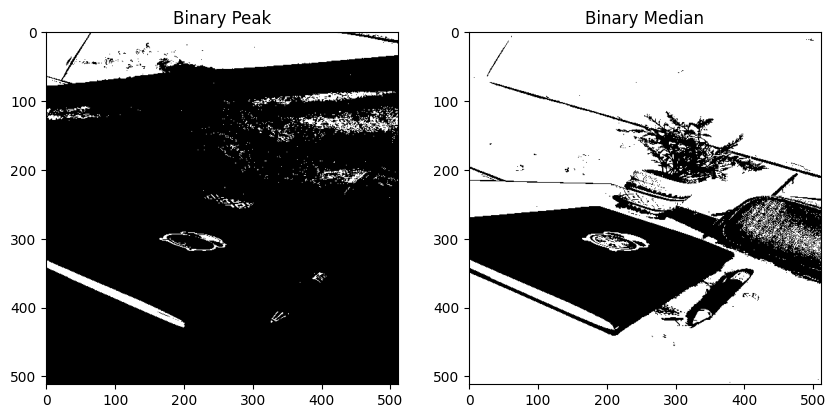

In [ ]:
# Using the peak of the histogram or the median value, binarise the gray scale image and show it
peak_value = np.argmax(hist)

median_value = 129
_, binary_peak = cv2.threshold(gray_image, peak_value, 255, cv2.THRESH_BINARY)
binary_median = np.where(gray_image > median_value, 255, 0).astype(np.uint8)

plt.figure(figsize =(10,5))

plt.subplot(1,2,1)
plt.imshow(binary_peak, cmap="gray")
plt.title('Binary Peak')

plt.subplot(1,2,2)
plt.imshow(binary_median, cmap="gray")
plt.title('Binary Median')

plt.show()

## Color Segmentation

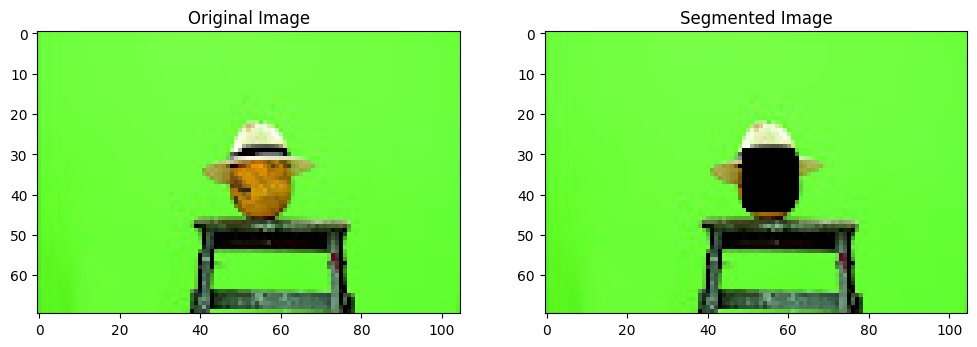

In [ ]:
# Load the image attached to the assignment called "segment"
image = cv2.imread('segment.jpg')

# Convert to suitable color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for segmentation, we want to extract the object. Hint: you can extract the green then inverse the mask
lower_color = np.array([40, 40, 40])
upper_color = np.array([80, 255, 255])

# Create a mask with the specified color range
mask = cv2.inRange(hsv_image, lower_color, upper_color)

# enhance the mask using morphological operations
kernel = np.ones((11, 11), np.uint8)
closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# apply the mask on the original RGB image
segmented_image = cv2.bitwise_and(image, image, mask=closed)

# Display the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')

plt.show()

## Feature extraction

### Harris

Execution time of Harris Corner Detection: 0.00152 seconds


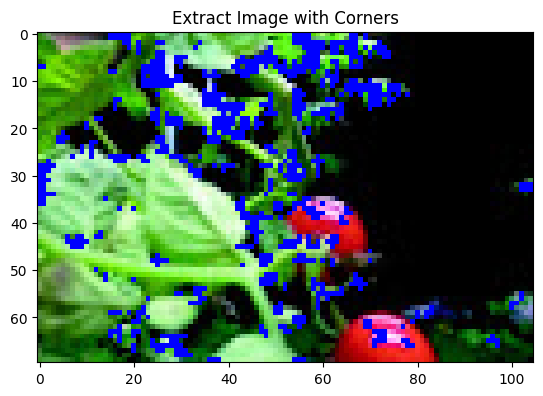

In [ ]:
# Load the image attached to the assignment called "extract"
import time
extract = cv2.imread('extract.jpg')

# convert it to suitable color space and value type for Harries function
gray_image = cv2.cvtColor(extract, cv2.COLOR_BGR2GRAY)
gray_image_float32 = np.float32(gray_image)

# Apply Harris function, and print its execution time
start_time = time.time()
harris_response = cv2.cornerHarris(gray_image_float32, 2, 3, 0.04)
end_time = time.time()

print("Execution time of Harris Corner Detection: {:.5f} seconds".format(end_time - start_time))

# Filter the number of corners and show them in red on the original RGB image
threshold = 0.01 * harris_response.max()

image_with_corners = extract.copy()

harris_resized = cv2.resize(harris_response, (image_with_corners.shape[1], image_with_corners.shape[0]))


# Draw corners in red on the original RGB image
image_with_corners[harris_resized > threshold] = [255, 0, 0]

# Display the original RGB image with detected corners
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Extract Image with Corners')
plt.show()

### SIFT

SIFT function execution time: 0.03533744812011719 seconds
Number of keypoints detected by SIFT: 130


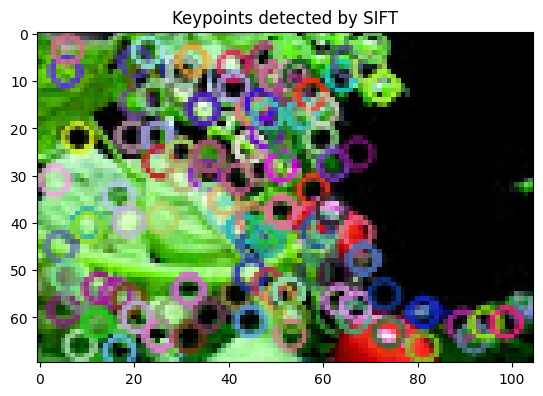

In [ ]:
# convert it to suitable color space and value type for SIFT function
image = cv2.imread('extract.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply SIFT function, and print its execution time and number of keypoints
start_time = time.time()
sift = cv2.SIFT_create()
keypoints_sift = sift.detect(gray_image, None)
end_time = time.time()
execution_time_sift = end_time - start_time

print("SIFT function execution time:", execution_time_sift, "seconds")
print("Number of keypoints detected by SIFT:", len(keypoints_sift))

# show the keypoints on the origional RGB image
image_with_keypoints_sift = cv2.drawKeypoints(image, keypoints_sift, None)
plt.imshow(cv2.cvtColor(image_with_keypoints_sift, cv2.COLOR_BGR2RGB))
plt.title('Keypoints detected by SIFT')
plt.show()

### Fast

FAST function execution time: 0.003985404968261719 seconds
Number of keypoints detected by FAST: 303


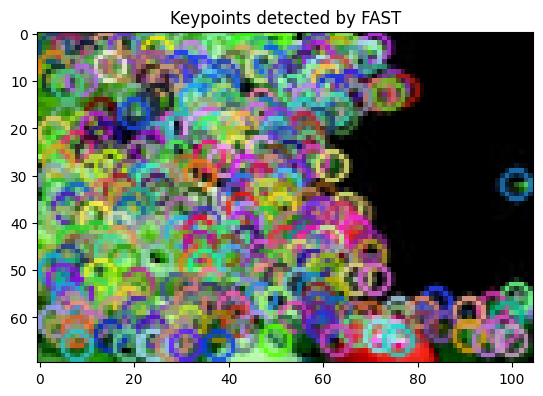

In [ ]:
# convert it to suitable color space and value type for Fast function
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply FAST function, and print its execution time and number of keypoints
start_time = time.time()
fast = cv2.FastFeatureDetector_create()
keypoints_fast = fast.detect(gray_image, None)
end_time = time.time()
execution_time_fast = end_time - start_time

print("FAST function execution time:", execution_time_fast, "seconds")
print("Number of keypoints detected by FAST:", len(keypoints_fast))

# show the keypoints on the origional RGB image
image_with_keypoints_fast = cv2.drawKeypoints(image, keypoints_fast, None)
plt.imshow(cv2.cvtColor(image_with_keypoints_fast, cv2.COLOR_BGR2RGB))
plt.title('Keypoints detected by FAST')
plt.show()

## What real life problems can you solve using the methods applied in this assignment?

Your Answer Here:
1- I think It can be used to identify and identify diamonds, precious materials and gold found in the ground and distinguish them from ordinary stones.
(In separating fine materials or even things that are difficult for humans to separate and require a lot of manpower)

2- It can be used to improve the quality of old documents and separate texts from the background.

3- Also in analyzing medical x-ray images to detect diseases early and with greater accuracy.